#                                                                      PREDICTON OF PAYMENT 

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

pd. set_option('display.max_columns', 300)
pd. set_option('display.max_rows',300)

In [2]:
#Loading the dataset
data=pd.read_csv(r"D:\vishal\OneDrive\Desktop\project\highradius\H2HBABBA2600.csv")

## Displaying method

In [3]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR llc,2019-07-16 00:00:00,2019.0,1.929571e+09,2019-07-05,20190703,20190705,20190720.0,USD,RV,1.0,NaN,62344.43,20190705.0,NAH4,1.929571e+09,0
1,U001,0200769623,WAL-MAR corp,2020-02-26 00:00:00,2020.0,1.930520e+09,2020-02-15,20200213,20200215,20200301.0,USD,RV,1.0,NaN,37500.69,20200215.0,NAH4,1.930520e+09,0
2,CA02,0140104950,MULT in,2019-09-03 00:00:00,2019.0,2.960573e+09,2019-08-14,20190814,20190814,20190826.0,CAD,RV,1.0,NaN,2778.75,20190816.0,CA10,2.960573e+09,0
3,U001,0200773364,U R M trust,2020-02-21 00:00:00,2020.0,1.930474e+09,2020-02-05,20200204,20200205,20200220.0,USD,RV,1.0,NaN,166000.23,20200205.0,NAA8,1.930474e+09,0
4,CA02,0140106293,ATLANT,2019-12-02 00:00:00,2019.0,2.960593e+09,2019-11-14,20191114,20191114,20191202.0,CAD,RV,1.0,NaN,555.35,20191122.0,CA10,2.960593e+09,0


In [4]:
data.tail()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
49995,U001,0100021540,MASTER llc,2019-05-15 00:00:00,2019.0,1.929246e+09,2019-05-02,20190502,20190502,20190512.0,USD,RV,1.0,NaN,17292.75,20190502.0,NA10,1.929246e+09,0
49996,U001,0200714710,SYSCO llc,2019-10-28 00:00:00,2019.0,1.929996e+09,2019-10-11,20191010,20191011,20191026.0,USD,RV,1.0,NaN,3179.73,20191011.0,NAA8,1.929996e+09,0
49997,U001,0200759878,SA corp,2019-08-27 00:00:00,2019.0,1.929718e+09,2019-08-10,20190807,20190810,20190825.0,USD,RV,1.0,NaN,13209.25,20190810.0,NAH4,1.929718e+09,0
49998,U001,0200769623,WAL-MAR systems,2019-11-19 00:00:00,2019.0,1.930129e+09,2019-11-08,20191108,20191108,20191123.0,USD,RV,1.0,NaN,53084.08,20191108.0,NAH4,1.930129e+09,0
49999,U001,0200794332,COST corporation,NaN,2020.0,1.930690e+09,2020-03-24,20200324,20200324,20200408.0,USD,RV,1.0,NaN,14772.55,20200324.0,NAAX,1.930690e+09,1


In [5]:
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR llc,2019-07-16 00:00:00,2019.0,1.929571e+09,2019-07-05,20190703,20190705,20190720.0,USD,RV,1.0,NaN,62344.43,20190705.0,NAH4,1.929571e+09,0
1,U001,0200769623,WAL-MAR corp,2020-02-26 00:00:00,2020.0,1.930520e+09,2020-02-15,20200213,20200215,20200301.0,USD,RV,1.0,NaN,37500.69,20200215.0,NAH4,1.930520e+09,0
2,CA02,0140104950,MULT in,2019-09-03 00:00:00,2019.0,2.960573e+09,2019-08-14,20190814,20190814,20190826.0,CAD,RV,1.0,NaN,2778.75,20190816.0,CA10,2.960573e+09,0
3,U001,0200773364,U R M trust,2020-02-21 00:00:00,2020.0,1.930474e+09,2020-02-05,20200204,20200205,20200220.0,USD,RV,1.0,NaN,166000.23,20200205.0,NAA8,1.930474e+09,0
4,CA02,0140106293,ATLANT,2019-12-02 00:00:00,2019.0,2.960593e+09,2019-11-14,20191114,20191114,20191202.0,CAD,RV,1.0,NaN,555.35,20191122.0,CA10,2.960593e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0100021540,MASTER llc,2019-05-15 00:00:00,2019.0,1.929246e+09,2019-05-02,20190502,20190502,20190512.0,USD,RV,1.0,NaN,17292.75,20190502.0,NA10,1.929246e+09,0
49996,U001,0200714710,SYSCO llc,2019-10-28 00:00:00,2019.0,1.929996e+09,2019-10-11,20191010,20191011,20191026.0,USD,RV,1.0,NaN,3179.73,20191011.0,NAA8,1.929996e+09,0
49997,U001,0200759878,SA corp,2019-08-27 00:00:00,2019.0,1.929718e+09,2019-08-10,20190807,20190810,20190825.0,USD,RV,1.0,NaN,13209.25,20190810.0,NAH4,1.929718e+09,0
49998,U001,0200769623,WAL-MAR systems,2019-11-19 00:00:00,2019.0,1.930129e+09,2019-11-08,20191108,20191108,20191123.0,USD,RV,1.0,NaN,53084.08,20191108.0,NAH4,1.930129e+09,0


In [6]:
data.shape

(50000, 19)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

# CREATING THE TARGET COLUMN

Our target column is to be delay to calculate delay we need to find the difference betweeen the clear_date and due_in_date
For finding the difference first step is to convert the clear_date and due_in_date into datetime format and finally delay is calculated.

In [8]:
#converison of clear_date to datetime dtype
data['clear_date']= pd.to_datetime(data['clear_date'])

In [9]:
#conversion of due_in_date from float to int
data["due_in_date"] = data['due_in_date'].astype('int')
#now converting the int type to date format
data['due_in_date'] = pd.to_datetime(data['due_in_date'], format='%Y%m%d')

In [10]:
#displaying the dtypes after converting into datetime format
data.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date                      object
document_create_date               int64
document_create_date.1             int64
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
posting_id                       float64
area_business                    float64
total_open_amount                float64
baseline_create_date             float64
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
dtype: object

In [11]:
#difference between clear_due and due_in_date gives delay
delay=(data.clear_date-data.due_in_date)

In [12]:
#displaying the dalay
delay

0       -4 days
1       -4 days
2        8 days
3        1 days
4        0 days
          ...  
49995    3 days
49996    2 days
49997    2 days
49998   -4 days
49999       NaT
Length: 50000, dtype: timedelta64[ns]

In [13]:
#adding the delay column into the dataframe
data.insert(19,"Delay",delay,True)

In [14]:
#converting to days format
data['Delay']=data.Delay.dt.days

In [15]:
#converting the negative values into zero
data['Delay']=data.Delay.mask(data.Delay.lt(0),0)

In [16]:
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay
0,U001,200769623,WAL-MAR llc,2019-07-16,2019.0,1.929571e+09,2019-07-05,20190703,20190705,2019-07-20,USD,RV,1.0,NaN,62344.43,20190705.0,NAH4,1.929571e+09,0,0.0
1,U001,0200769623,WAL-MAR corp,2020-02-26,2020.0,1.930520e+09,2020-02-15,20200213,20200215,2020-03-01,USD,RV,1.0,NaN,37500.69,20200215.0,NAH4,1.930520e+09,0,0.0
2,CA02,0140104950,MULT in,2019-09-03,2019.0,2.960573e+09,2019-08-14,20190814,20190814,2019-08-26,CAD,RV,1.0,NaN,2778.75,20190816.0,CA10,2.960573e+09,0,8.0
3,U001,0200773364,U R M trust,2020-02-21,2020.0,1.930474e+09,2020-02-05,20200204,20200205,2020-02-20,USD,RV,1.0,NaN,166000.23,20200205.0,NAA8,1.930474e+09,0,1.0
4,CA02,0140106293,ATLANT,2019-12-02,2019.0,2.960593e+09,2019-11-14,20191114,20191114,2019-12-02,CAD,RV,1.0,NaN,555.35,20191122.0,CA10,2.960593e+09,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0100021540,MASTER llc,2019-05-15,2019.0,1.929246e+09,2019-05-02,20190502,20190502,2019-05-12,USD,RV,1.0,NaN,17292.75,20190502.0,NA10,1.929246e+09,0,3.0
49996,U001,0200714710,SYSCO llc,2019-10-28,2019.0,1.929996e+09,2019-10-11,20191010,20191011,2019-10-26,USD,RV,1.0,NaN,3179.73,20191011.0,NAA8,1.929996e+09,0,2.0
49997,U001,0200759878,SA corp,2019-08-27,2019.0,1.929718e+09,2019-08-10,20190807,20190810,2019-08-25,USD,RV,1.0,NaN,13209.25,20190810.0,NAH4,1.929718e+09,0,2.0
49998,U001,0200769623,WAL-MAR systems,2019-11-19,2019.0,1.930129e+09,2019-11-08,20191108,20191108,2019-11-23,USD,RV,1.0,NaN,53084.08,20191108.0,NAH4,1.930129e+09,0,0.0


In [17]:
data.shape

(50000, 20)

# Separating the dataframe based on null and notnull condition on target 

In [18]:
#splitting the dataframe into train data which has no null values on the basis of clear_date which will help in prediction
train_data=data[data.clear_date.isnull()==False]

In [19]:
train_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay
0,U001,200769623,WAL-MAR llc,2019-07-16,2019.0,1.929571e+09,2019-07-05,20190703,20190705,2019-07-20,USD,RV,1.0,NaN,62344.43,20190705.0,NAH4,1.929571e+09,0,0.0
1,U001,0200769623,WAL-MAR corp,2020-02-26,2020.0,1.930520e+09,2020-02-15,20200213,20200215,2020-03-01,USD,RV,1.0,NaN,37500.69,20200215.0,NAH4,1.930520e+09,0,0.0
2,CA02,0140104950,MULT in,2019-09-03,2019.0,2.960573e+09,2019-08-14,20190814,20190814,2019-08-26,CAD,RV,1.0,NaN,2778.75,20190816.0,CA10,2.960573e+09,0,8.0
3,U001,0200773364,U R M trust,2020-02-21,2020.0,1.930474e+09,2020-02-05,20200204,20200205,2020-02-20,USD,RV,1.0,NaN,166000.23,20200205.0,NAA8,1.930474e+09,0,1.0
4,CA02,0140106293,ATLANT,2019-12-02,2019.0,2.960593e+09,2019-11-14,20191114,20191114,2019-12-02,CAD,RV,1.0,NaN,555.35,20191122.0,CA10,2.960593e+09,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200418007,AM,2020-03-11,2020.0,1.930559e+09,2020-02-25,20200223,20200225,2020-03-11,USD,RV,1.0,NaN,85477.90,20200225.0,NAA8,1.930559e+09,0,0.0
49995,U001,0100021540,MASTER llc,2019-05-15,2019.0,1.929246e+09,2019-05-02,20190502,20190502,2019-05-12,USD,RV,1.0,NaN,17292.75,20190502.0,NA10,1.929246e+09,0,3.0
49996,U001,0200714710,SYSCO llc,2019-10-28,2019.0,1.929996e+09,2019-10-11,20191010,20191011,2019-10-26,USD,RV,1.0,NaN,3179.73,20191011.0,NAA8,1.929996e+09,0,2.0
49997,U001,0200759878,SA corp,2019-08-27,2019.0,1.929718e+09,2019-08-10,20190807,20190810,2019-08-25,USD,RV,1.0,NaN,13209.25,20190810.0,NAH4,1.929718e+09,0,2.0


In [20]:
#splitting the dataframe into test data which has null values on the basis of clear_date which will help in prediction
test_data=data[data.clear_date.isnull()==True]

In [21]:
test_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay
6,U001,0200769623,WAL-MAR trust,NaT,2020.0,1.930596e+09,2020-03-04,20200303,20200304,2020-03-19,USD,RV,1.0,NaN,12827.50,20200304.0,NAH4,1.930596e+09,1,NaN
8,U001,0200769623,WAL-MAR llc,NaT,2020.0,1.930795e+09,2020-04-17,20200416,20200417,2020-05-02,USD,RV,1.0,NaN,4332.93,20200417.0,NAH4,1.930795e+09,1,NaN
21,U001,0200726979,BJ'S corp,NaT,2020.0,1.930673e+09,2020-03-19,20200319,20200319,2020-04-03,USD,RV,1.0,NaN,5752.44,20200319.0,NAA8,1.930673e+09,1,NaN
30,U001,0200772670,ASSOCIAT,NaT,2020.0,1.930686e+09,2020-03-22,20200322,20200322,2020-04-06,USD,RV,1.0,NaN,76572.88,20200322.0,NAU5,1.930686e+09,1,NaN
31,U001,0200761734,H E BUT corporation,NaT,2020.0,1.930700e+09,2020-03-25,20200325,20200325,2020-04-09,USD,RV,1.0,NaN,53809.18,20200325.0,NAA8,1.930700e+09,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49983,U001,0200760666,KEHE in,NaT,2020.0,1.930631e+09,2020-03-12,20200310,20200312,2020-03-27,USD,RV,1.0,NaN,4904.68,20200312.0,NAA8,1.930631e+09,1,NaN
49986,U001,0200230690,DECA in,NaT,2020.0,1.930672e+09,2020-03-20,20200320,20200320,2020-04-08,USD,RV,1.0,NaN,7339.62,20200316.0,NAM4,1.930672e+09,1,NaN
49988,U001,0200705742,DOT trust,NaT,2020.0,1.930702e+09,2020-03-26,20200325,20200326,2020-04-15,USD,RV,1.0,NaN,3899.82,20200326.0,NAD1,1.930702e+09,1,NaN
49992,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930748e+09,2020-04-06,20200405,20200406,2020-04-21,USD,RV,1.0,NaN,61.29,20200406.0,NAH4,1.930748e+09,1,NaN


In [22]:
train_data.shape, test_data.shape

((40000, 20), (10000, 20))

# Preprocessing 

### Null imputation

In [23]:
#to sum up data null value in each column
train_data.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             40000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    7
isOpen                        0
Delay                         0
dtype: int64

In [24]:
#appending the train_data with no null values in the invoice_id column
train_data=train_data[train_data.invoice_id.isnull()==False]

In [25]:
train_data.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             39993
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
Delay                         0
dtype: int64

In [26]:
#dropping the area_business column as it is a empty column 
#and displaying
train_data=train_data.drop(['area_business'], axis = 1)

In [27]:
train_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay
0,U001,200769623,WAL-MAR llc,2019-07-16,2019.0,1.929571e+09,2019-07-05,20190703,20190705,2019-07-20,USD,RV,1.0,62344.43,20190705.0,NAH4,1.929571e+09,0,0.0
1,U001,0200769623,WAL-MAR corp,2020-02-26,2020.0,1.930520e+09,2020-02-15,20200213,20200215,2020-03-01,USD,RV,1.0,37500.69,20200215.0,NAH4,1.930520e+09,0,0.0
2,CA02,0140104950,MULT in,2019-09-03,2019.0,2.960573e+09,2019-08-14,20190814,20190814,2019-08-26,CAD,RV,1.0,2778.75,20190816.0,CA10,2.960573e+09,0,8.0
3,U001,0200773364,U R M trust,2020-02-21,2020.0,1.930474e+09,2020-02-05,20200204,20200205,2020-02-20,USD,RV,1.0,166000.23,20200205.0,NAA8,1.930474e+09,0,1.0
4,CA02,0140106293,ATLANT,2019-12-02,2019.0,2.960593e+09,2019-11-14,20191114,20191114,2019-12-02,CAD,RV,1.0,555.35,20191122.0,CA10,2.960593e+09,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200418007,AM,2020-03-11,2020.0,1.930559e+09,2020-02-25,20200223,20200225,2020-03-11,USD,RV,1.0,85477.90,20200225.0,NAA8,1.930559e+09,0,0.0
49995,U001,0100021540,MASTER llc,2019-05-15,2019.0,1.929246e+09,2019-05-02,20190502,20190502,2019-05-12,USD,RV,1.0,17292.75,20190502.0,NA10,1.929246e+09,0,3.0
49996,U001,0200714710,SYSCO llc,2019-10-28,2019.0,1.929996e+09,2019-10-11,20191010,20191011,2019-10-26,USD,RV,1.0,3179.73,20191011.0,NAA8,1.929996e+09,0,2.0
49997,U001,0200759878,SA corp,2019-08-27,2019.0,1.929718e+09,2019-08-10,20190807,20190810,2019-08-25,USD,RV,1.0,13209.25,20190810.0,NAH4,1.929718e+09,0,2.0


In [28]:
train_data.shape

(39993, 19)

In [29]:
#once again let us check any null values are there in the train_data after performing null imputation
train_data.isna().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                0
isOpen                    0
Delay                     0
dtype: int64

In [30]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39993 entries, 0 to 49998
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           39993 non-null  object        
 1   cust_number             39993 non-null  object        
 2   name_customer           39993 non-null  object        
 3   clear_date              39993 non-null  datetime64[ns]
 4   buisness_year           39993 non-null  float64       
 5   doc_id                  39993 non-null  float64       
 6   posting_date            39993 non-null  object        
 7   document_create_date    39993 non-null  int64         
 8   document_create_date.1  39993 non-null  int64         
 9   due_in_date             39993 non-null  datetime64[ns]
 10  invoice_currency        39993 non-null  object        
 11  document type           39993 non-null  object        
 12  posting_id              39993 non-null  float6

### TIME DATE CONVERSION

#conversion of business_year from float to int
train_data["buisness_year"] = train_data['buisness_year'].astype('int')
train_data['buisness_year'] = pd.to_datetime(train_data['buisness_year'], format='%Y')

In [31]:
#conversion oof posting_date from object to datetime
train_data['posting_date'] = pd.to_datetime(train_data['posting_date'])

In [32]:
#conversion of document_create_date from object to datetime
train_data['document_create_date'] = pd.to_datetime(train_data['document_create_date'], format='%Y%m%d')

In [33]:
#conversion of document_create_date.1 from object to datetime
train_data['document_create_date.1'] = pd.to_datetime(train_data['document_create_date.1'], format='%Y%m%d')

In [34]:
#conversion of baseline_create_date from float to int
train_data["baseline_create_date"] =train_data['baseline_create_date'].astype('int')
#now converting the int type to date format
train_data['baseline_create_date'] = pd.to_datetime(train_data['baseline_create_date'], format='%Y%m%d')

In [35]:
#to check the conversion 
train_data.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
posting_id                       float64
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
Delay                            float64
dtype: object

### Duplicate/constant removal

In [36]:
train_data.cov()

,buisness_year,doc_id,posting_id,total_open_amount,invoice_id,isOpen,Delay
buisness_year,1.164664e-01,-1.074470e+06,0.0,-6.714851e+01,-1.074470e+06,0.0,-2.342674e-02
doc_id,-1.074470e+06,7.920025e+16,0.0,2.155914e+12,7.920025e+16,0.0,3.125837e+08
posting_id,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00
total_open_amount,-6.714851e+01,2.155914e+12,0.0,1.562310e+09,2.155914e+12,0.0,-1.861895e+04
invoice_id,-1.074470e+06,7.920025e+16,0.0,2.155914e+12,7.920025e+16,0.0,3.125837e+08
isOpen,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00
Delay,-2.342674e-02,3.125837e+08,0.0,-1.861895e+04,3.125837e+08,0.0,8.584776e+01


In [37]:
#nunique for finding the unquie column values
#value_counts this counts the unquie values 
train_data.nunique()

business_code                 6
cust_number                1375
name_customer              3941
clear_date                  397
buisness_year                 2
doc_id                    39109
posting_date                422
document_create_date        425
document_create_date.1      422
due_in_date                 493
invoice_currency              2
document type                 1
posting_id                    1
total_open_amount         35612
baseline_create_date        429
cust_payment_terms           68
invoice_id                39109
isOpen                        1
Delay                       110
dtype: int64

In [38]:
# For catagorical columns the low unique value is 6
# if the unique count is 1 then the column is a constant column 

for col in train_data.columns:
    if train_data[col].nunique()<= 6:
        print(train_data[col].value_counts())
        print('')

U001    36050
CA02     3248
U013      557
U002      123
U005       13
U007        2
Name: business_code, dtype: int64

2019.0    34611
2020.0     5382
Name: buisness_year, dtype: int64

USD    36744
CAD     3249
Name: invoice_currency, dtype: int64

RV    39993
Name: document type, dtype: int64

1.0    39993
Name: posting_id, dtype: int64

0    39993
Name: isOpen, dtype: int64



In [39]:
# clubbing some business with low occurance from the train_data to ensure model gets max information
train_data['business_code'] = np.where(train_data['business_code'].isin(["U005","U007"]),
                                       "Other business_code",train_data['business_code'])

### Sorting the train_data

In [40]:
# sorting the train_data asccending according to the posting_date
# just by sorting we could easily work on the past month records while splitting the train_data 

train_data.sort_values(by=['posting_date'],inplace=True)

# SPLITTING

In [41]:
# splitting the train_data into X and y so that we can do the train_test_split function

# X contains the dataframe without the target value (Delay)
X = train_data.drop('Delay',axis=1)

# y contains only the target value (Delay)
y = train_data['Delay']

In [42]:
#just to check whether the Delay column has been dropped
X

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
28558,U001,0200769623,WAL-MAR,2019-01-10,2019.0,1.928544e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,1764.66,2018-12-30,NAH4,1.928544e+09,0
46850,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,1.928543e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,25306.92,2018-12-30,NAH4,1.928543e+09,0
23157,U001,0200769623,WAL-MAR llc,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,4890.99,2018-12-30,NAH4,1.928541e+09,0
48608,U001,0200769623,WAL-MAR co,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,22060.83,2018-12-30,NAH4,1.928541e+09,0
47123,U001,0200739534,OK co,2019-01-14,2019.0,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,90998.80,2018-12-30,NAA8,1.928541e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33363,U001,0100031704,DELHAIZE us,2020-03-17,2020.0,1.930580e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,109024.52,2020-02-27,NAA8,1.930580e+09,0
9640,U001,0200571849,US llc,2020-03-13,2020.0,1.930580e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,44063.16,2020-02-27,NAA8,1.930580e+09,0
19371,U001,0200777735,NASH us,2020-03-11,2020.0,1.930578e+09,2020-02-27,2020-02-27,2020-02-27,2020-05-02,USD,RV,1.0,47259.54,2020-02-27,NAGD,1.930578e+09,0
43395,U001,0100031704,DELHAIZE corporation,2020-03-17,2020.0,1.930580e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,1.0,104459.83,2020-02-27,NAA8,1.930580e+09,0


In [43]:
# just to check whether the Delay column is there in y
y

28558    0.0
46850    0.0
23157    0.0
48608    0.0
47123    0.0
        ... 
33363    4.0
9640     0.0
19371    0.0
43395    4.0
47323    0.0
Name: Delay, Length: 39993, dtype: float64

In [44]:
#splitting the X,y into a ratio of 70:30  i.e 30% data fed to intermediate test data set
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.3,random_state=0 , shuffle = False)

In [45]:
#splitting the X_inter_test and y_inter_test into a ratio of 70:30  i.e 30% data fed to intermediate test data set
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test ,test_size=0.5,random_state=0 , shuffle = False)

In [46]:
#to check splitting 
X_train.shape , X_val.shape , X_test.shape

((27995, 18), (5999, 18), (5999, 18))

# EDA

<AxesSubplot:xlabel='Delay', ylabel='Density'>

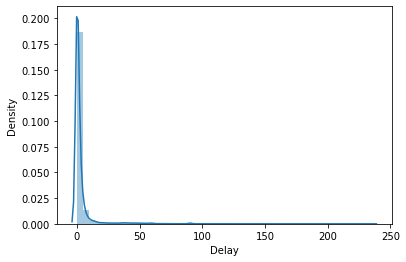

In [47]:
# Let us see the distribution of the target column which the Delay 

sns.distplot(y_train)

In [48]:
#from the above graph it is shown clearly that this is a right skewed distribution

<AxesSubplot:xlabel='Delay', ylabel='isOpen'>

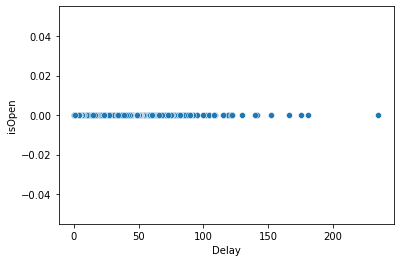

In [49]:
#we are merge the y_train with the X_train for doing the scatterplot 
#No direct trend
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="Delay", y="isOpen")

# FEATURE ENGINEERING

In [50]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27995 entries, 28558 to 25337
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           27995 non-null  object        
 1   cust_number             27995 non-null  object        
 2   name_customer           27995 non-null  object        
 3   clear_date              27995 non-null  datetime64[ns]
 4   buisness_year           27995 non-null  float64       
 5   doc_id                  27995 non-null  float64       
 6   posting_date            27995 non-null  datetime64[ns]
 7   document_create_date    27995 non-null  datetime64[ns]
 8   document_create_date.1  27995 non-null  datetime64[ns]
 9   due_in_date             27995 non-null  datetime64[ns]
 10  invoice_currency        27995 non-null  object        
 11  document type           27995 non-null  object        
 12  posting_id              27995 non-null  fl

In [51]:
## the model will only understand when the columns values are in int or float so we are going to use Label encoders to do this.

In [52]:
#business_code
business_code_encoder = LabelEncoder()
business_code_encoder.fit(X_train['business_code'])
X_train['business_code_enc'] = business_code_encoder.transform(X_train['business_code'])


X_val['business_code_enc'] = business_code_encoder.transform(X_val['business_code'])


X_test['business_code_enc'] = business_code_encoder.transform(X_test['business_code'])


In [53]:
# creating a function that will delete a column from train , val and test
def dropping(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

In [54]:
X_train ,X_val, X_test = dropping(['business_code'])

In [55]:
#cust_number
cust_number_encoder = LabelEncoder()
cust_number_encoder.fit(X_train['cust_number'])
X_train['cust_number_enc'] = cust_number_encoder.transform(X_train['cust_number'])


cust_number_encoder.fit(X_val['cust_number'])
X_val['cust_number_enc'] = cust_number_encoder.transform(X_val['cust_number'])


cust_number_encoder.fit(X_test['cust_number'])
X_test['cust_number_enc'] = cust_number_encoder.transform(X_test['cust_number'])



X_train ,X_val, X_test = dropping(['cust_number'])

In [56]:
#name_customer
name_customer_encoder = LabelEncoder()
name_customer_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc'] = name_customer_encoder.transform(X_train['name_customer'])

name_customer_encoder.fit(X_val['name_customer'])
X_val['name_customer_enc'] = name_customer_encoder.transform(X_val['name_customer'])

name_customer_encoder.fit(X_test['name_customer'])
X_test['name_customer_enc'] = name_customer_encoder.transform(X_test['name_customer'])


X_train ,X_val, X_test = dropping(['name_customer'])

In [57]:
#invoice_currency
invoice_currency_encoder = LabelEncoder()
invoice_currency_encoder.fit(X_train['invoice_currency'])
X_train['invoice_currency_enc'] = invoice_currency_encoder.transform(X_train['invoice_currency'])


invoice_currency_encoder.fit(X_val['invoice_currency'])
X_val['invoice_currency_enc'] = invoice_currency_encoder.transform(X_val['invoice_currency'])


invoice_currency_encoder.fit(X_test['invoice_currency'])
X_test['invoice_currency_enc'] = invoice_currency_encoder.transform(X_test['invoice_currency'])


X_train ,X_val, X_test = dropping(['invoice_currency'])

In [58]:
#document type
document_type_encoder = LabelEncoder()
document_type_encoder.fit(X_train['document type'])
X_train['document_type_enc'] = document_type_encoder.transform(X_train['document type'])


document_type_encoder.fit(X_val['document type'])
X_val['document_type_enc'] = document_type_encoder.transform(X_val['document type'])


document_type_encoder.fit(X_test['document type'])
X_test['document_type_enc'] = document_type_encoder.transform(X_test['document type'])


X_train ,X_val, X_test = dropping(['document type'])

In [59]:
#cust_payment_terms
cust_payment_terms_encoder = LabelEncoder()
cust_payment_terms_encoder.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(X_train['cust_payment_terms'])

cust_payment_terms_encoder.fit(X_val['cust_payment_terms'])
X_val['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(X_val['cust_payment_terms'])


cust_payment_terms_encoder.fit(X_test['cust_payment_terms'])
X_test['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(X_test['cust_payment_terms'])


X_train ,X_val, X_test = dropping(['cust_payment_terms'])

In [60]:
#Clear_date
#day in week
X_train['day_of_clear'] = X_train['clear_date'].dt.weekday 
X_val['day_of_clear'] = X_val['clear_date'].dt.weekday 
X_test['day_of_clear'] = X_test['clear_date'].dt.weekday

#extract day,month and year 

X_train['clear_date_day'] = X_train['clear_date'].dt.day
X_train['clear_date_month'] = X_train['clear_date'].dt.month
X_train['clear_date_year'] = X_train['clear_date'].dt.year

X_val['clear_date_day'] = X_val['clear_date'].dt.day
X_val['clear_date_month'] = X_val['clear_date'].dt.month
X_val['clear_date_year'] = X_val['clear_date'].dt.year


X_test['clear_date_day'] = X_test['clear_date'].dt.day
X_test['clear_date_month'] = X_test['clear_date'].dt.month
X_test['clear_date_year'] = X_test['clear_date'].dt.year

X_train ,X_val, X_test = dropping(['clear_date'])

In [61]:
#posting_date
#day in week
X_train['day_of_posting'] = X_train['posting_date'].dt.weekday 
X_val['day_of_posting'] = X_val['posting_date'].dt.weekday 
X_test['day_of_posting'] = X_test['posting_date'].dt.weekday

X_train['posting_date_day'] = X_train['posting_date'].dt.day
X_train['posting_date_month'] = X_train['posting_date'].dt.month
X_train['posting_date_year'] = X_train['posting_date'].dt.year

X_val['posting_date_day'] = X_val['posting_date'].dt.day
X_val['posting_date_month'] = X_val['posting_date'].dt.month
X_val['posting_date_year'] = X_val['posting_date'].dt.year


X_test['posting_date_day'] = X_test['posting_date'].dt.day
X_test['posting_date_month'] = X_test['posting_date'].dt.month
X_test['posting_date_year'] = X_test['posting_date'].dt.year

X_train ,X_val, X_test = dropping(['posting_date'])

In [62]:
#document_create_date
#day in week
X_train['day_of_document'] = X_train['document_create_date'].dt.weekday 
X_val['day_of_document'] = X_val['document_create_date'].dt.weekday 
X_test['day_of_document'] = X_test['document_create_date'].dt.weekday

X_train['document_create_day'] = X_train['document_create_date'].dt.day
X_train['document_create_month'] = X_train['document_create_date'].dt.month
X_train['document_create_year'] = X_train['document_create_date'].dt.year

X_val['document_create_day'] = X_val['document_create_date'].dt.day
X_val['document_create_month'] = X_val['document_create_date'].dt.month
X_val['document_create_year'] = X_val['document_create_date'].dt.year


X_test['document_create_day'] = X_test['document_create_date'].dt.day
X_test['document_create_month'] = X_test['document_create_date'].dt.month
X_test['document_create_year'] = X_test['document_create_date'].dt.year

X_train ,X_val, X_test = dropping(['document_create_date'])

In [63]:
#document_create_date.1
#day in week
X_train['day_of_document1'] = X_train['document_create_date.1'].dt.weekday 
X_val['day_of_document1'] = X_val['document_create_date.1'].dt.weekday 
X_test['day_of_document1'] = X_test['document_create_date.1'].dt.weekday

X_train['document1_create_day'] = X_train['document_create_date.1'].dt.day
X_train['document1_create_month'] = X_train['document_create_date.1'].dt.month
X_train['document1_create_year'] = X_train['document_create_date.1'].dt.year

X_val['document1_create_day'] = X_val['document_create_date.1'].dt.day
X_val['document1_create_month'] = X_val['document_create_date.1'].dt.month
X_val['document1_create_year'] = X_val['document_create_date.1'].dt.year


X_test['document1_create_day'] = X_test['document_create_date.1'].dt.day
X_test['document1_create_month'] = X_test['document_create_date.1'].dt.month
X_test['document1_create_year'] = X_test['document_create_date.1'].dt.year

X_train ,X_val, X_test = dropping(['document_create_date.1'])

In [64]:
#due_in_date
#day in week
X_train['day_of_due'] = X_train['due_in_date'].dt.weekday 
X_val['day_of_due'] = X_val['due_in_date'].dt.weekday 
X_test['day_of_due'] = X_test['due_in_date'].dt.weekday

X_train['due_in_day'] = X_train['due_in_date'].dt.day
X_train['due_in_month'] = X_train['due_in_date'].dt.month
X_train['due_in_year'] = X_train['due_in_date'].dt.year

X_val['due_in_day'] = X_val['due_in_date'].dt.day
X_val['due_in_month'] = X_val['due_in_date'].dt.month
X_val['due_in_year'] = X_val['due_in_date'].dt.year


X_test['due_in_day'] = X_test['due_in_date'].dt.day
X_test['due_in_month'] = X_test['due_in_date'].dt.month
X_test['due_in_year'] = X_test['due_in_date'].dt.year

X_train ,X_val, X_test = dropping(['due_in_date'])

In [65]:
#baseline_create_date
#day in week
X_train['day_of_baseline'] = X_train['baseline_create_date'].dt.weekday 
X_val['day_of_baseline'] = X_val['baseline_create_date'].dt.weekday 
X_test['day_of_baseline'] = X_test['baseline_create_date'].dt.weekday

X_train['baseline_create_day'] = X_train['baseline_create_date'].dt.day
X_train['baseline_create_month'] = X_train['baseline_create_date'].dt.month
X_train['baseline_create_year'] = X_train['baseline_create_date'].dt.year

X_val['baseline_create_day'] = X_val['baseline_create_date'].dt.day
X_val['baseline_create_month'] = X_val['baseline_create_date'].dt.month
X_val['baseline_create_year'] = X_val['baseline_create_date'].dt.year


X_test['baseline_create_day'] = X_test['baseline_create_date'].dt.day
X_test['baseline_create_month'] = X_test['baseline_create_date'].dt.month
X_test['baseline_create_year'] = X_test['baseline_create_date'].dt.year

X_train ,X_val, X_test = dropping(['baseline_create_date'])

In [66]:
##converting the floats value into int
X_train["buisness_year"] =X_train['buisness_year'].astype('int')

X_train["doc_id"] =X_train['doc_id'].astype('int')

X_train["posting_id"] =X_train['posting_id'].astype('int')

X_train["total_open_amount"] =X_train['total_open_amount'].astype('int')

X_train["invoice_id"] =X_train['invoice_id'].astype('int')

In [67]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27995 entries, 28558 to 25337
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   buisness_year           27995 non-null  int32
 1   doc_id                  27995 non-null  int32
 2   posting_id              27995 non-null  int32
 3   total_open_amount       27995 non-null  int32
 4   invoice_id              27995 non-null  int32
 5   isOpen                  27995 non-null  int64
 6   business_code_enc       27995 non-null  int32
 7   cust_number_enc         27995 non-null  int32
 8   name_customer_enc       27995 non-null  int32
 9   invoice_currency_enc    27995 non-null  int32
 10  document_type_enc       27995 non-null  int32
 11  cust_payment_terms_enc  27995 non-null  int32
 12  day_of_clear            27995 non-null  int64
 13  clear_date_day          27995 non-null  int64
 14  clear_date_month        27995 non-null  int64
 15  clear_date_year

In [68]:
# wrote a custom function to do a status check  on all the dataframes 
def status_check(traindf = X_train,valdf = X_val,testdf = X_test):
    print(traindf.info())
    print("")
    print(traindf.shape,valdf.shape,testdf.shape)
    print("Train Null Count")
    print(traindf.isna().sum())
    print("Test Null Count")
    print(testdf.isna().sum())    
    print("Val Null Count")
    print(valdf.isna().sum())

In [69]:
status_check()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27995 entries, 28558 to 25337
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   buisness_year           27995 non-null  int32
 1   doc_id                  27995 non-null  int32
 2   posting_id              27995 non-null  int32
 3   total_open_amount       27995 non-null  int32
 4   invoice_id              27995 non-null  int32
 5   isOpen                  27995 non-null  int64
 6   business_code_enc       27995 non-null  int32
 7   cust_number_enc         27995 non-null  int32
 8   name_customer_enc       27995 non-null  int32
 9   invoice_currency_enc    27995 non-null  int32
 10  document_type_enc       27995 non-null  int32
 11  cust_payment_terms_enc  27995 non-null  int32
 12  day_of_clear            27995 non-null  int64
 13  clear_date_day          27995 non-null  int64
 14  clear_date_month        27995 non-null  int64
 15  clear_date_year

# Feature selection

<AxesSubplot:title={'center':'Payment Correlation of Features'}>

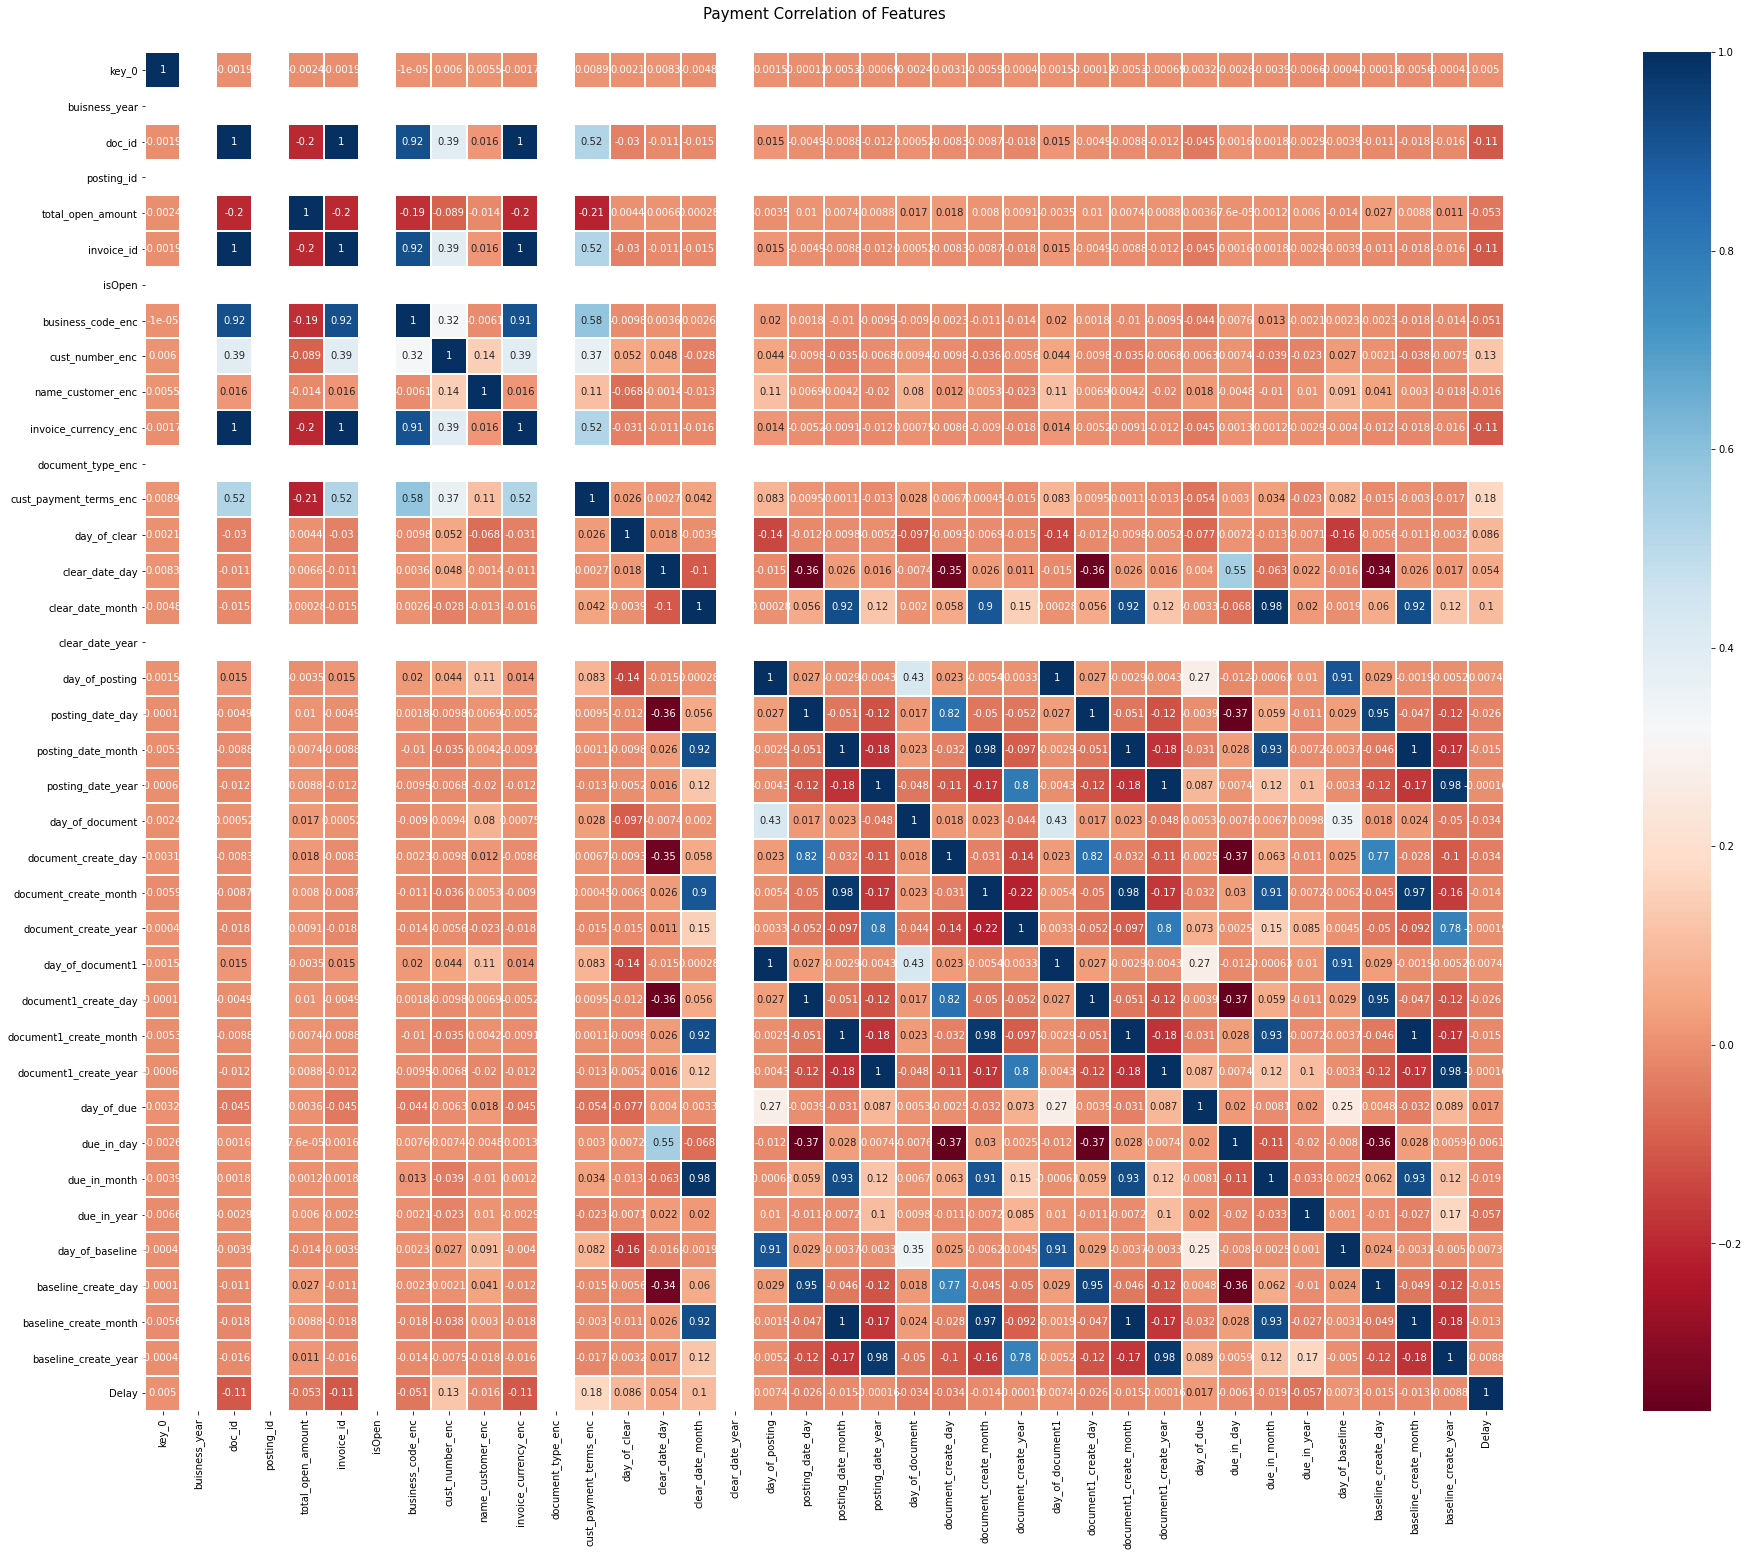

In [70]:
#Feature Selection

colormap = plt.cm.RdBu
plt.figure(figsize=(50,25))
plt.title('Payment Correlation of Features', y=1.02, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [71]:

# since all the columns have been converted to int we can find variancetThreshold

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0)
sel.fit(X_train)

VarianceThreshold(threshold=0)

In [72]:
sel.variances_

array([0.00000000e+00, 4.13931697e+09, 0.00000000e+00, 6.68593000e+05,
       4.13931697e+09, 0.00000000e+00, 3.74963210e-01, 1.26400000e+03,
       3.36200000e+03, 7.54076687e-02, 0.00000000e+00, 6.30000000e+01,
       2.21285826e+00, 3.00000000e+01, 7.30011495e+00, 0.00000000e+00,
       3.23654024e+00, 3.00000000e+01, 7.17414312e+00, 5.01124620e-03,
       3.21879268e+00, 3.00000000e+01, 7.21451301e+00, 7.26911374e-03,
       3.23654024e+00, 3.00000000e+01, 7.17414312e+00, 5.01124620e-03,
       3.50865263e+00, 3.00000000e+01, 7.24625426e+00, 2.14303571e-04,
       3.26906151e+00, 3.00000000e+01, 7.18464526e+00, 5.04660577e-03])

In [73]:
#dropping because in heat is white space because that we will not provide information for the model
X_train,X_val ,X_test = dropping(['buisness_year'])

In [74]:
X_train,X_val ,X_test = dropping(['isOpen'])

In [75]:
X_train,X_val ,X_test = dropping(['document_type_enc'])

In [76]:
X_train,X_val ,X_test = dropping(['clear_date_year'])

In [77]:
X_train,X_val ,X_test = dropping(['posting_id'])

<AxesSubplot:title={'center':'Payment Correlation of Features'}>

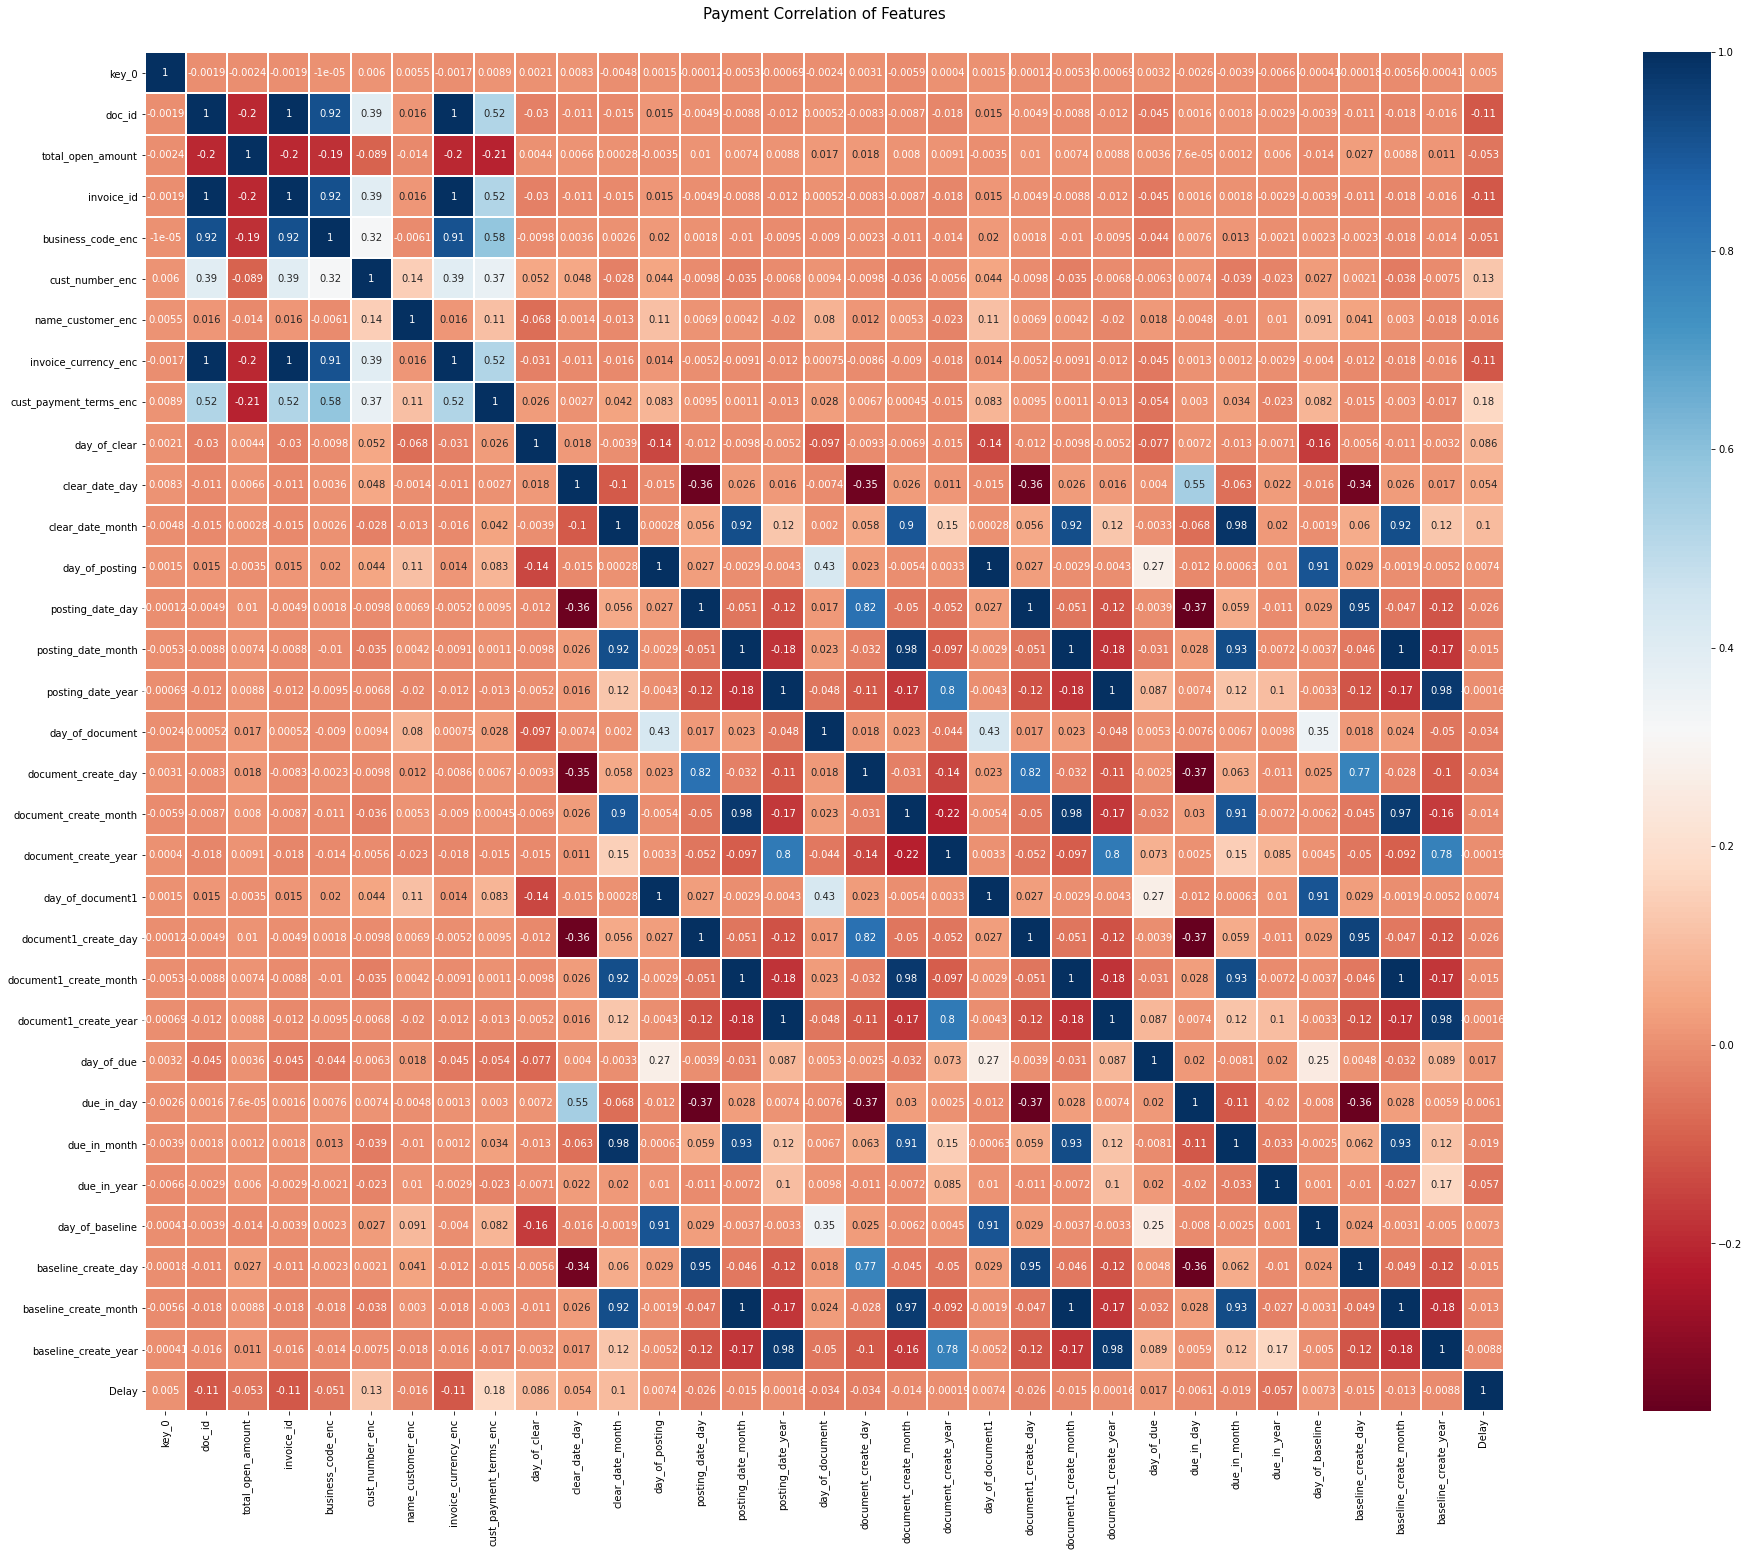

In [78]:
colormap = plt.cm.RdBu
plt.figure(figsize=(50,25))
plt.title('Payment Correlation of Features', y=1.02, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=1.5,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [79]:
X_train.dtypes

doc_id                    int32
total_open_amount         int32
invoice_id                int32
business_code_enc         int32
cust_number_enc           int32
name_customer_enc         int32
invoice_currency_enc      int32
cust_payment_terms_enc    int32
day_of_clear              int64
clear_date_day            int64
clear_date_month          int64
day_of_posting            int64
posting_date_day          int64
posting_date_month        int64
posting_date_year         int64
day_of_document           int64
document_create_day       int64
document_create_month     int64
document_create_year      int64
day_of_document1          int64
document1_create_day      int64
document1_create_month    int64
document1_create_year     int64
day_of_due                int64
due_in_day                int64
due_in_month              int64
due_in_year               int64
day_of_baseline           int64
baseline_create_day       int64
baseline_create_month     int64
baseline_create_year      int64
dtype: o

# Modelling

## create a base model

In [80]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train, y_train)

LinearRegression()

In [81]:
y_predict = base_model.predict(X_val)

In [82]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_predict,y_val,squared=False)

3.81205475739153

In [83]:
from sklearn.metrics import r2_score
r2_score(y_val, y_predict)

0.5447721276814765

## Tree based model

In [84]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=5)

In [85]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [86]:
y_predict2 = regressor.predict(X_val)

In [87]:
mean_squared_error(y_val, y_predict2, squared=False)

10.80760342352002

In [88]:
r2_score(y_val, y_predict2)

-2.659058766765667

# RIDGE based model¶

In [89]:
from sklearn import linear_model
regressor = linear_model.Ridge(alpha=.5)
regressor.fit(X_train, y_train)

Ridge(alpha=0.5)

In [90]:
y_predict2 = regressor.predict(X_val)

In [91]:
mean_squared_error(y_val, y_predict2, squared=False)

3.119767125201662

In [92]:
r2_score(y_val, y_predict2)

0.6951017449706751

### checking the prediction on the X_test set to confirm that the model is not getting overfitted

In [93]:
y_predict_test = regressor.predict(X_test)
mean_squared_error(y_test, y_predict_test, squared=False)

253.51464172145225

# TEST_DATA

## we are going to fill the ddelay column using the model and fill it up

In [94]:
#just to see the delay column with null
test_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay
6,U001,0200769623,WAL-MAR trust,NaT,2020.0,1.930596e+09,2020-03-04,20200303,20200304,2020-03-19,USD,RV,1.0,NaN,12827.50,20200304.0,NAH4,1.930596e+09,1,NaN
8,U001,0200769623,WAL-MAR llc,NaT,2020.0,1.930795e+09,2020-04-17,20200416,20200417,2020-05-02,USD,RV,1.0,NaN,4332.93,20200417.0,NAH4,1.930795e+09,1,NaN
21,U001,0200726979,BJ'S corp,NaT,2020.0,1.930673e+09,2020-03-19,20200319,20200319,2020-04-03,USD,RV,1.0,NaN,5752.44,20200319.0,NAA8,1.930673e+09,1,NaN
30,U001,0200772670,ASSOCIAT,NaT,2020.0,1.930686e+09,2020-03-22,20200322,20200322,2020-04-06,USD,RV,1.0,NaN,76572.88,20200322.0,NAU5,1.930686e+09,1,NaN
31,U001,0200761734,H E BUT corporation,NaT,2020.0,1.930700e+09,2020-03-25,20200325,20200325,2020-04-09,USD,RV,1.0,NaN,53809.18,20200325.0,NAA8,1.930700e+09,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49983,U001,0200760666,KEHE in,NaT,2020.0,1.930631e+09,2020-03-12,20200310,20200312,2020-03-27,USD,RV,1.0,NaN,4904.68,20200312.0,NAA8,1.930631e+09,1,NaN
49986,U001,0200230690,DECA in,NaT,2020.0,1.930672e+09,2020-03-20,20200320,20200320,2020-04-08,USD,RV,1.0,NaN,7339.62,20200316.0,NAM4,1.930672e+09,1,NaN
49988,U001,0200705742,DOT trust,NaT,2020.0,1.930702e+09,2020-03-26,20200325,20200326,2020-04-15,USD,RV,1.0,NaN,3899.82,20200326.0,NAD1,1.930702e+09,1,NaN
49992,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930748e+09,2020-04-06,20200405,20200406,2020-04-21,USD,RV,1.0,NaN,61.29,20200406.0,NAH4,1.930748e+09,1,NaN


In [95]:
#to check null values
test_data.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             10000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
Delay                     10000
dtype: int64

In [96]:
#dropping the null value columns in X_test_data
X_test_data = test_data.drop(['clear_date','area_business','Delay'],axis=1)

In [97]:
#dropping the null value columns in test_data
test_data.drop(['Delay'], inplace =True,axis=1)

In [98]:
##time date conversion

In [99]:
X_test_data['baseline_create_date'] = pd.to_datetime(X_test_data['baseline_create_date'])

In [100]:
X_test_data['document_create_date'] = pd.to_datetime(X_test_data['document_create_date'])

In [101]:
X_test_data['document_create_date.1'] = pd.to_datetime(X_test_data['document_create_date.1'])

In [102]:
X_test_data['posting_date'] = pd.to_datetime(X_test_data['posting_date'])

In [103]:
##float to int

In [104]:
X_test_data["buisness_year"] =X_test_data['buisness_year'].astype('int')

X_test_data["doc_id"] =X_test_data['doc_id'].astype('int')

X_test_data["posting_id"] =X_test_data['posting_id'].astype('int')

X_test_data["total_open_amount"] =X_test_data['total_open_amount'].astype('int')

X_test_data["invoice_id"] =X_test_data['invoice_id'].astype('int')

In [105]:
X_test_data.dtypes

business_code                     object
cust_number                       object
name_customer                     object
buisness_year                      int32
doc_id                             int32
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
posting_id                         int32
total_open_amount                  int32
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                         int32
isOpen                             int64
dtype: object

### feature eng

In [106]:
#converting into int by LabelEncoder()

In [107]:
business_code_encoder = LabelEncoder()
business_code_encoder.fit(X_test_data['business_code'])
X_test_data['business_code_enc'] = business_code_encoder.transform(X_test_data['business_code'])

In [108]:
business_code_encoder = LabelEncoder()
business_code_encoder.fit(X_test_data['cust_number'])
X_test_data['cust_number_enc'] = business_code_encoder.transform(X_test_data['cust_number'])

In [109]:
business_code_encoder = LabelEncoder()
business_code_encoder.fit(X_test_data['name_customer'])
X_test_data['name_customer_enc'] = business_code_encoder.transform(X_test_data['name_customer'])

In [110]:
business_code_encoder = LabelEncoder()
business_code_encoder.fit(X_test_data['invoice_currency'])
X_test_data['invoice_currency_enc'] = business_code_encoder.transform(X_test_data['invoice_currency'])

In [111]:
business_code_encoder = LabelEncoder()
business_code_encoder.fit(X_test_data['document type'])
X_test_data['document_type_enc'] = business_code_encoder.transform(X_test_data['document type'])

In [112]:
business_code_encoder = LabelEncoder()
business_code_encoder.fit(X_test_data['cust_payment_terms'])
X_test_data['cust_payment_terms'] = business_code_encoder.transform(X_test_data['cust_payment_terms'])

In [113]:
X_test_data.dtypes

business_code                     object
cust_number                       object
name_customer                     object
buisness_year                      int32
doc_id                             int32
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
posting_id                         int32
total_open_amount                  int32
baseline_create_date      datetime64[ns]
cust_payment_terms                 int32
invoice_id                         int32
isOpen                             int64
business_code_enc                  int32
cust_number_enc                    int32
name_customer_enc                  int32
invoice_currency_enc               int32
document_type_enc                  int32
dtype: object

In [114]:
X_test_data['day_of_posting'] = X_test_data['posting_date'].dt.weekday
X_test_data['posting_date_day'] = X_test_data['posting_date'].dt.day
X_test_data['posting_date_month'] = X_test_data['posting_date'].dt.month
X_test_data['posting_date_year'] = X_test_data['posting_date'].dt.year

In [115]:
X_test_data['day_of_due'] = X_test_data['due_in_date'].dt.weekday
X_test_data['due_in_day'] = X_test_data['due_in_date'].dt.day
X_test_data['due_in_month'] = X_test_data['due_in_date'].dt.month
X_test_data['due_in_year'] = X_test_data['due_in_date'].dt.year

In [116]:
X_test_data['day_of_baseline'] = X_test_data['baseline_create_date'].dt.weekday
X_test_data['baseline_create_day'] = X_test_data['baseline_create_date'].dt.day
X_test_data['baseline_create_month'] = X_test_data['baseline_create_date'].dt.month
X_test_data['baseline_create_year'] = X_test_data['baseline_create_date'].dt.year

In [117]:
X_test_data.dtypes

business_code                     object
cust_number                       object
name_customer                     object
buisness_year                      int32
doc_id                             int32
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
posting_id                         int32
total_open_amount                  int32
baseline_create_date      datetime64[ns]
cust_payment_terms                 int32
invoice_id                         int32
isOpen                             int64
business_code_enc                  int32
cust_number_enc                    int32
name_customer_enc                  int32
invoice_currency_enc               int32
document_type_enc                  int32
day_of_posting                     int64
posting_date_day                   int64
posting_date_mon

In [118]:

# Deleteing the object/datetime counter parts

X_test_data.drop(['business_code','cust_number','name_customer','invoice_currency','document type','posting_date','document_create_date','document_create_date.1','due_in_date','baseline_create_date','baseline_create_year'],inplace =True ,axis=1)

In [119]:
X_test_data.drop(['buisness_year','posting_id','cust_payment_terms','isOpen','document_type_enc'],inplace =True ,axis=1)

In [120]:
X_train.drop(['day_of_clear','cust_payment_terms_enc','clear_date_day','clear_date_month','day_of_document','document_create_day','document_create_month','document_create_year','day_of_document1','document1_create_day','document1_create_month','document1_create_year','baseline_create_year'],inplace =True ,axis=1)

In [121]:
#to compare the columns of X_test and X

In [122]:
X_train.head()

,doc_id,total_open_amount,invoice_id,business_code_enc,cust_number_enc,name_customer_enc,invoice_currency_enc,day_of_posting,posting_date_day,posting_date_month,posting_date_year,day_of_due,due_in_day,due_in_month,due_in_year,day_of_baseline,baseline_create_day,baseline_create_month
28558,1928543623,1764,1928543623,2,762,3253,1,6,30,12,2018,0,14,1,2019,6,30,12
46850,1928543258,25306,1928543258,2,762,3258,1,6,30,12,2018,0,14,1,2019,6,30,12
23157,1928540933,4890,1928540933,2,762,3260,1,6,30,12,2018,0,14,1,2019,6,30,12
48608,1928540647,22060,1928540647,2,762,3255,1,6,30,12,2018,0,14,1,2019,6,30,12
47123,1928541140,90998,1928541140,2,691,2196,1,6,30,12,2018,0,14,1,2019,6,30,12


In [123]:
X_test_data.head()

,doc_id,total_open_amount,invoice_id,business_code_enc,cust_number_enc,name_customer_enc,invoice_currency_enc,day_of_posting,posting_date_day,posting_date_month,posting_date_year,day_of_due,due_in_day,due_in_month,due_in_year,day_of_baseline,baseline_create_day,baseline_create_month
6,1930596027,12827,1930596027,1,385,1682,1,2,4,3,2020,3,19,3,2020,3,1,1
8,1930795062,4332,1930795062,1,385,1680,1,4,17,4,2020,5,2,5,2020,3,1,1
21,1930672951,5752,1930672951,1,321,184,1,3,19,3,2020,4,3,4,2020,3,1,1
30,1930685942,76572,1930685942,1,390,104,1,6,22,3,2020,0,6,4,2020,3,1,1
31,1930700487,53809,1930700487,1,372,651,1,2,25,3,2020,3,9,4,2020,3,1,1


# FINALS 

In [124]:
regressor = DecisionTreeRegressor(random_state=0 , max_depth=5)
regressor.fit(X_train, y_train)
final_result = regressor.predict(X_test_data)

In [125]:
final_result = pd.Series(final_result,name='Delay')


In [126]:
test_data.reset_index(drop=True,inplace=True)

In [127]:
Final = test_data.merge(final_result , on = X_test_data.index )
Final

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay
0,6,U001,0200769623,WAL-MAR trust,NaT,2020.0,1.930596e+09,2020-03-04,20200303,20200304,2020-03-19,USD,RV,1.0,NaN,12827.50,20200304.0,NAH4,1.930596e+09,1,4.359098
1,8,U001,0200769623,WAL-MAR llc,NaT,2020.0,1.930795e+09,2020-04-17,20200416,20200417,2020-05-02,USD,RV,1.0,NaN,4332.93,20200417.0,NAH4,1.930795e+09,1,4.359098
2,21,U001,0200726979,BJ'S corp,NaT,2020.0,1.930673e+09,2020-03-19,20200319,20200319,2020-04-03,USD,RV,1.0,NaN,5752.44,20200319.0,NAA8,1.930673e+09,1,4.359098
3,30,U001,0200772670,ASSOCIAT,NaT,2020.0,1.930686e+09,2020-03-22,20200322,20200322,2020-04-06,USD,RV,1.0,NaN,76572.88,20200322.0,NAU5,1.930686e+09,1,4.359098
4,31,U001,0200761734,H E BUT corporation,NaT,2020.0,1.930700e+09,2020-03-25,20200325,20200325,2020-04-09,USD,RV,1.0,NaN,53809.18,20200325.0,NAA8,1.930700e+09,1,4.359098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49983,U001,0200760666,KEHE in,NaT,2020.0,1.930631e+09,2020-03-12,20200310,20200312,2020-03-27,USD,RV,1.0,NaN,4904.68,20200312.0,NAA8,1.930631e+09,1,4.359098
9996,49986,U001,0200230690,DECA in,NaT,2020.0,1.930672e+09,2020-03-20,20200320,20200320,2020-04-08,USD,RV,1.0,NaN,7339.62,20200316.0,NAM4,1.930672e+09,1,4.359098
9997,49988,U001,0200705742,DOT trust,NaT,2020.0,1.930702e+09,2020-03-26,20200325,20200326,2020-04-15,USD,RV,1.0,NaN,3899.82,20200326.0,NAD1,1.930702e+09,1,4.359098
9998,49992,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930748e+09,2020-04-06,20200405,20200406,2020-04-21,USD,RV,1.0,NaN,61.29,20200406.0,NAH4,1.930748e+09,1,4.359098


In [128]:
#predicting the clear_date
Final['Delay']=Final['Delay'].astype(int)

In [129]:
Final['Clearing date'] = Final['due_in_date'].add(Final['Delay'])

In [130]:
Final

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay,Clearing date
0,6,U001,0200769623,WAL-MAR trust,NaT,2020.0,1.930596e+09,2020-03-04,20200303,20200304,2020-03-19,USD,RV,1.0,NaN,12827.50,20200304.0,NAH4,1.930596e+09,1,4,2020-03-19 00:00:00.000000004
1,8,U001,0200769623,WAL-MAR llc,NaT,2020.0,1.930795e+09,2020-04-17,20200416,20200417,2020-05-02,USD,RV,1.0,NaN,4332.93,20200417.0,NAH4,1.930795e+09,1,4,2020-05-02 00:00:00.000000004
2,21,U001,0200726979,BJ'S corp,NaT,2020.0,1.930673e+09,2020-03-19,20200319,20200319,2020-04-03,USD,RV,1.0,NaN,5752.44,20200319.0,NAA8,1.930673e+09,1,4,2020-04-03 00:00:00.000000004
3,30,U001,0200772670,ASSOCIAT,NaT,2020.0,1.930686e+09,2020-03-22,20200322,20200322,2020-04-06,USD,RV,1.0,NaN,76572.88,20200322.0,NAU5,1.930686e+09,1,4,2020-04-06 00:00:00.000000004
4,31,U001,0200761734,H E BUT corporation,NaT,2020.0,1.930700e+09,2020-03-25,20200325,20200325,2020-04-09,USD,RV,1.0,NaN,53809.18,20200325.0,NAA8,1.930700e+09,1,4,2020-04-09 00:00:00.000000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49983,U001,0200760666,KEHE in,NaT,2020.0,1.930631e+09,2020-03-12,20200310,20200312,2020-03-27,USD,RV,1.0,NaN,4904.68,20200312.0,NAA8,1.930631e+09,1,4,2020-03-27 00:00:00.000000004
9996,49986,U001,0200230690,DECA in,NaT,2020.0,1.930672e+09,2020-03-20,20200320,20200320,2020-04-08,USD,RV,1.0,NaN,7339.62,20200316.0,NAM4,1.930672e+09,1,4,2020-04-08 00:00:00.000000004
9997,49988,U001,0200705742,DOT trust,NaT,2020.0,1.930702e+09,2020-03-26,20200325,20200326,2020-04-15,USD,RV,1.0,NaN,3899.82,20200326.0,NAD1,1.930702e+09,1,4,2020-04-15 00:00:00.000000004
9998,49992,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930748e+09,2020-04-06,20200405,20200406,2020-04-21,USD,RV,1.0,NaN,61.29,20200406.0,NAH4,1.930748e+09,1,4,2020-04-21 00:00:00.000000004


In [131]:
## bucketizing

In [132]:
bucket = []
for x in Final['Delay']:
    if x<0:
        bucket.append("0-15days")
    elif x>=1 and x<=15:
        bucket.append("1-15days")
    elif x>=16 and x<30:
        bucket.append("16-30days")
    elif x>=31 and x<=45:
        bucket.append("31-45days")
    else:
        bucket.append("<45 days")
Final['Bucket']= bucket


In [133]:
Final

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay,Clearing date,Bucket
0,6,U001,0200769623,WAL-MAR trust,NaT,2020.0,1.930596e+09,2020-03-04,20200303,20200304,2020-03-19,USD,RV,1.0,NaN,12827.50,20200304.0,NAH4,1.930596e+09,1,4,2020-03-19 00:00:00.000000004,1-15days
1,8,U001,0200769623,WAL-MAR llc,NaT,2020.0,1.930795e+09,2020-04-17,20200416,20200417,2020-05-02,USD,RV,1.0,NaN,4332.93,20200417.0,NAH4,1.930795e+09,1,4,2020-05-02 00:00:00.000000004,1-15days
2,21,U001,0200726979,BJ'S corp,NaT,2020.0,1.930673e+09,2020-03-19,20200319,20200319,2020-04-03,USD,RV,1.0,NaN,5752.44,20200319.0,NAA8,1.930673e+09,1,4,2020-04-03 00:00:00.000000004,1-15days
3,30,U001,0200772670,ASSOCIAT,NaT,2020.0,1.930686e+09,2020-03-22,20200322,20200322,2020-04-06,USD,RV,1.0,NaN,76572.88,20200322.0,NAU5,1.930686e+09,1,4,2020-04-06 00:00:00.000000004,1-15days
4,31,U001,0200761734,H E BUT corporation,NaT,2020.0,1.930700e+09,2020-03-25,20200325,20200325,2020-04-09,USD,RV,1.0,NaN,53809.18,20200325.0,NAA8,1.930700e+09,1,4,2020-04-09 00:00:00.000000004,1-15days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49983,U001,0200760666,KEHE in,NaT,2020.0,1.930631e+09,2020-03-12,20200310,20200312,2020-03-27,USD,RV,1.0,NaN,4904.68,20200312.0,NAA8,1.930631e+09,1,4,2020-03-27 00:00:00.000000004,1-15days
9996,49986,U001,0200230690,DECA in,NaT,2020.0,1.930672e+09,2020-03-20,20200320,20200320,2020-04-08,USD,RV,1.0,NaN,7339.62,20200316.0,NAM4,1.930672e+09,1,4,2020-04-08 00:00:00.000000004,1-15days
9997,49988,U001,0200705742,DOT trust,NaT,2020.0,1.930702e+09,2020-03-26,20200325,20200326,2020-04-15,USD,RV,1.0,NaN,3899.82,20200326.0,NAD1,1.930702e+09,1,4,2020-04-15 00:00:00.000000004,1-15days
9998,49992,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930748e+09,2020-04-06,20200405,20200406,2020-04-21,USD,RV,1.0,NaN,61.29,20200406.0,NAH4,1.930748e+09,1,4,2020-04-21 00:00:00.000000004,1-15days


In [134]:
Final['Clearing date'] = pd.to_datetime(Final['Clearing date'],infer_datetime_format=True).dt.date

In [135]:
Final

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay,Clearing date,Bucket
0,6,U001,0200769623,WAL-MAR trust,NaT,2020.0,1.930596e+09,2020-03-04,20200303,20200304,2020-03-19,USD,RV,1.0,NaN,12827.50,20200304.0,NAH4,1.930596e+09,1,4,2020-03-19,1-15days
1,8,U001,0200769623,WAL-MAR llc,NaT,2020.0,1.930795e+09,2020-04-17,20200416,20200417,2020-05-02,USD,RV,1.0,NaN,4332.93,20200417.0,NAH4,1.930795e+09,1,4,2020-05-02,1-15days
2,21,U001,0200726979,BJ'S corp,NaT,2020.0,1.930673e+09,2020-03-19,20200319,20200319,2020-04-03,USD,RV,1.0,NaN,5752.44,20200319.0,NAA8,1.930673e+09,1,4,2020-04-03,1-15days
3,30,U001,0200772670,ASSOCIAT,NaT,2020.0,1.930686e+09,2020-03-22,20200322,20200322,2020-04-06,USD,RV,1.0,NaN,76572.88,20200322.0,NAU5,1.930686e+09,1,4,2020-04-06,1-15days
4,31,U001,0200761734,H E BUT corporation,NaT,2020.0,1.930700e+09,2020-03-25,20200325,20200325,2020-04-09,USD,RV,1.0,NaN,53809.18,20200325.0,NAA8,1.930700e+09,1,4,2020-04-09,1-15days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49983,U001,0200760666,KEHE in,NaT,2020.0,1.930631e+09,2020-03-12,20200310,20200312,2020-03-27,USD,RV,1.0,NaN,4904.68,20200312.0,NAA8,1.930631e+09,1,4,2020-03-27,1-15days
9996,49986,U001,0200230690,DECA in,NaT,2020.0,1.930672e+09,2020-03-20,20200320,20200320,2020-04-08,USD,RV,1.0,NaN,7339.62,20200316.0,NAM4,1.930672e+09,1,4,2020-04-08,1-15days
9997,49988,U001,0200705742,DOT trust,NaT,2020.0,1.930702e+09,2020-03-26,20200325,20200326,2020-04-15,USD,RV,1.0,NaN,3899.82,20200326.0,NAD1,1.930702e+09,1,4,2020-04-15,1-15days
9998,49992,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930748e+09,2020-04-06,20200405,20200406,2020-04-21,USD,RV,1.0,NaN,61.29,20200406.0,NAH4,1.930748e+09,1,4,2020-04-21,1-15days


In [136]:
Final.dtypes

key_0                              int64
business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date                      object
document_create_date               int64
document_create_date.1             int64
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
posting_id                       float64
area_business                    float64
total_open_amount                float64
baseline_create_date             float64
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
Delay                              int32
Clearing date                     object
Bucket                            object
dtype: object

In [137]:
Final.to_csv('PPD2600.csv')